# QDA와 LDA

QDA(quadratic discriminant analysis)와 LDA(linear discriminant analysis)는 대표적인 확률론적 생성 모형(generative model)이다. Likelihood, 즉  y의 클래스 값에 따른 x의 분포에 대한 정보를 먼저 알아낸 후, 베이즈 정리를 사용하여 주어진 x에 대한 y의 확률 분포를 찾아낸다.

## 생성 모형

고혈압환자인지 아닌지 알고 싶은 경우, 고혈압환자일 때의 $x$ 값의 정규분포를 이용하는 것이 생성모형이다. 클래스 확률모형에서 데이터 값이 어디에 모여 있는지 보고 데이터 특성을 알 수 있다. 그러면 새로운 데이터를 생성할 수 있으며, 흐릿한 이미지가 데이터가 없는 부분을 채워넣을 수도 있다.(단, 새롭게 생성된 data는 train data에 bias될 수 있다.) 

생성 모형에서는 다음처럼 베이즈 정리를 사용하여 조건부 확률 $p(y = C_k \mid x)$ 을 계산한다.

$$
P(y = C_k \mid x) = \dfrac{P(x \mid y = C_k)\; P(y = C_k)}{P(x)}
$$

분류 문제를 풀기 위해서는 각 클래스 $k$에 대한 확률을 비교하여 가장 큰 값을 선택하므로 모든 클래스에 대해 값이 같은 분모 ${P(x)}$은 굳이 계산하지 않아도 괜찮다.

$$
P(y = C_k \mid x) \;\; \propto \;\; P(x \mid y = C_k) \; P(y = C_k)
$$

여기에서 사전 확률(prior) $P(y = C_k)$는 특별한 정보가 없는 경우, 다음처럼 계산한다.

$$
P(y = C_k) \approx \frac{y = C_k \text{인 데이터의 수 } \text{ } }{{\text{ }}\text{    모든 데이터의 수    }}
$$

만약 다른 지식이나 정보로 알고 있는 사전 확률값이 있다면 그 값을 사용하면 된다.

$y$에 대한 $x$의 조건부 확률인 likelihood는 일반적으로 정규 분포나 베르누이 분포와 같은 특정한 모형을 가정하여 다음과 같이 계산한다.

1. $P(x \mid y = C_k)$ 가 특정한 확률 분포 모형을 따른다고 가정한다. 즉, 확률 밀도 함수의 형태를 가정한다.
2. $k$번째 클래스에 속하는 트레이닝 데이터 $\{x_1, \cdots, x_N\}$을 사용하여 이 모형의 모수 값을 구한다.
3. 모수값을 알고 있으므로 $P(x \mid y = C_k)$의 확률 밀도 함수를 구한 것이다. 즉, 새로운 독립 변수 값 $x$이 어떤 값이 되더라도 $P(x \mid y = C_k)$의 값을 계산할 수 있다.

클래스 별로 $P(x \mid y = 0)$ 와 $P(x \mid y = 1)$만 알아내면 $x$를 넣었을 때 $P(y = 1 \mid x), P(y = 0 \mid x)$값을 구해서 이 중 크기가 큰 값으로 $y$ 클래스를 결정한다. 사전확률 $P(y = 1), P(y = 0)$은 상수이므로 확률에 크게 영향을 주지 않는다.

## QDA

**QDA에서는 독립 변수 $x$가 실수이고 확률 분포가 다변수 가우시안 정규 분포라고 가정**한다. 단 $x$ 분포의 위치와 형태는 클래스에 따라 달라질 수 있다.

$$
p(x \mid y = k) = \dfrac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) \right)
$$

이 분포들을 알고 있으면 독립 변수 $x$에 대한 $y$ 클래스의 조건부 확률 분포는 다음과 같이 베이즈 정리와 전체 확률의 법칙으로 구할 수 있다.

$$
P(y=k \mid x) = \dfrac{p(x \mid y = k)P(y=k)}{p(x)} = \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) }
$$

예를 들어 $y$가  1, 2, 3 이라는 3개의 클래스를 가지고 각 클래스에서의 $x$의 확률 분포가 다음과 같은 기대값 및 공분산 행렬을 가진다고 가정하자.

$$
\mu_1 = \begin{bmatrix}  0 \\ 0 \end{bmatrix}, \;\;
\mu_2 = \begin{bmatrix}  1 \\ 1 \end{bmatrix}, \;\;
\mu_3 = \begin{bmatrix}-1  \\ 1 \end{bmatrix}
$$

$$
\Sigma_1 = \begin{bmatrix} 0.7 &   0 \\ 0   & 0.7 \end{bmatrix}, \;\;
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}
$$

$y$의 사전 확률은 다음과 같이 동일하다

$$
P(Y=1) = P(Y=2) = P(Y=3) = \dfrac{1}{3}
$$

In [1]:
N = 100
np.random.seed(0)
X1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0], [0, 0.7]]).rvs(100)
X2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
X3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2*np.ones(N)
X = np.vstack([X1, X2, X3]) # 300 by 2
y = np.hstack([y1, y2, y3]) # 1 by 300

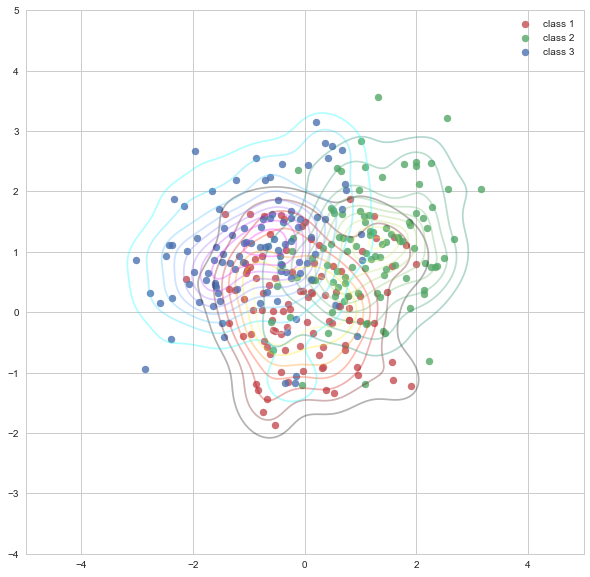

In [2]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, color='r', label="class 1")
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, color='g', label="class 2")
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, color='b', label="class 3")
sns.kdeplot(X1[:,0], X1[:,1], alpha=0.3, cmap=mpl.cm.hot)
sns.kdeplot(X2[:,0], X2[:,1], alpha=0.3, cmap=mpl.cm.summer)
sns.kdeplot(X3[:,0], X3[:,1], alpha=0.3, cmap=mpl.cm.cool)
plt.xlim(-5,5)
plt.ylim(-4,5)
plt.legend()
plt.show()

Scikit-Learn은 QDA모형을 위한 `QuadraticDiscriminantAnalysis` 클래스를 제공한다. 이 클래스를 사용하면 다음과 같은 속성을 계산한다.

* `means_`: 각 클래스 $k$에서 $x$의 기댓값 벡터 $\mu_k$의 추정치 벡터.
* `covariance_`: 각 클래스 $k$에서 $x$의 공분산 행렬 $\Sigma_k$의 추정치 행렬. (생성자 인수 `store_covariance` 값이 True인 경우에만 제공)

위에서 만든 데이터에 QDA 모형을 적용하면 다음처럼 각 클래스에 따른 확률 변수 분포의 모수를 추정하는 것을 볼 수 있다.

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [4]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [5]:
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [6]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [7]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

이 확률 분포를 사용하여 분류를 한 결과는 다음과 같다.

In [19]:
np.array([XX.ravel(), YY.ravel()]).T

array([[-5.  , -4.  ],
       [-4.99, -4.  ],
       [-4.98, -4.  ],
       ...,
       [ 4.97,  5.  ],
       [ 4.98,  5.  ],
       [ 4.99,  5.  ]])

In [8]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), 
                     np.arange(ymin, ymax, (ymax-ymin)/1000))


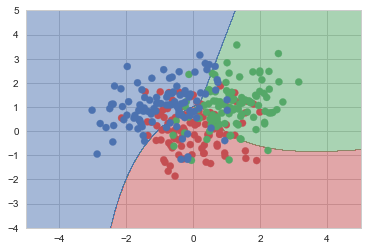

In [9]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), 
                     np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(qda.predict(np.array([XX.ravel(), YY.ravel()]).T), 
                XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

## LDA

클래스별로 공분산을 계산할 때 공분산의 크기는 ($x$의 개수) by ($x$의 개수) 크기로 나타나는데 독립변수 $x$의 개수가 데이터가 개수보다 많으면 행렬공분산의 성분 하나하나가 가지는 정보가 작아지고, 정보보다 오차가 더 많아지게 된다. 일반적으로도 클래스가 달라져도 $x$와 $y$의 상관관계가 바뀌지 않고 $\mu$만 달라지는 경우가 많기 때문에 클래스마다 공분산행렬이 동일하다고 가정하여 오차를 줄이고자 하는 방법이 LDA이다. 공분산 행렬을 같다고 가정하여 발생하는 오차보다 샘플링할 때 발생한 오차가 더 커서 무시할 수 있다.

LDA에서는 각 Y 클래스에 대한 독립 변수 X의 조건부 확률 분포가 **공통된 공분산 행렬을 가지는** 다변수 가우시안 정규 분포(multivariate Gaussian normal distribution)이라고 가정한다. 즉

$$ \Sigma_k = \Sigma \;\;\; \text{ for all } k $$

이다.

이 때는 조건부 확률 분포를 다음과 같이 정리할 수 있다.

$$
\begin{eqnarray}
\log p(x \mid y = k) 
&=& \log \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} -  \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} \left( x^T\Sigma^{-1}x - 2\mu_k^T \Sigma^{-1}x + \mu_k^T \Sigma^{-1}\mu_k \right) \\
&=& C(x)  + \mu_k^T \Sigma^{-1}x - \dfrac{1}{2} \mu_k^T \Sigma^{-1}\mu_k \\
\end{eqnarray}
$$


$$
\begin{eqnarray}
p(x \mid y = k) 
&=& C'(x)\exp(w_k^Tx + w_{k0}) \\
\end{eqnarray}
$$

이 식에서 $C'(x) = \exp C(x) $이다.

$$
\begin{eqnarray}
P(y=k \mid x) 
&=& \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) } \\
&=& \dfrac{C'(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{\sum_l C'(x)\exp(w_l^Tx + w_{l0})P(y=l) } \\
&=& \dfrac{C'(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{C'(x)\sum_l \exp(w_l^Tx + w_{l0})P(y=l) } \\
&=& \dfrac{P(y=k) \exp(w_k^Tx + w_{k0}) }{\sum_l P(y=l) \exp(w_l^Tx + w_{k0})} \\
&=& \dfrac{P(y=k) \exp(w_k^Tx + w_{k0}) }{P(x)} \\
\end{eqnarray}
$$

이 식에서 $P(x)$는 $y$ 클래스값에 영향을 받지 않는다.

따라서

$$
\log P(y=k \mid x) = \log P(y=k) + w_k^Tx + w_{k0} - \log{P(x)} = w_k^Tx + C''_k
$$

모든 클래스 $k$에 대해 위와 같은 식이 성립하므로 클래스 $k_1$과 클래스 $k_2$의 경계선, 즉 두 클래스에 대한 확률값이 같아지는 $x$ 위치를 찾으면 다음과 같다.

$$  w_{k_1}^Tx + C''_{k_1} = w_{k_2}^Tx + C''_{k_2} $$

$$  (w_{k_1} - w_{k_2})^Tx + (C''_{k_1} - C''_{k_2}) = 0 $$

$$  w^Tx + C = 0 $$


즉, 경계선 함수가 x에 대한 선형 방정식이 되고 경계선의 모양이 직선이 된다.

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3, 
                                 solver="svd", store_covariance=True).fit(X, y)

In [25]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [26]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

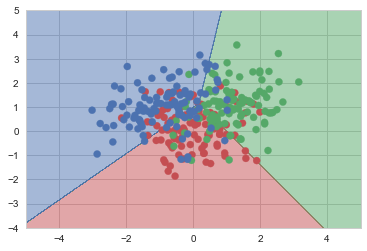

In [27]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), 
                     np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(lda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

#### 연습 문제 1

1. QDA와 LDA를 사용하여 붓꽃 분류 문제를 풀고 성능을 confusion matrix와 classification report를 구하여 비교한다.
2. 두 모형에 대해 (각 클래스에 대한 OvR 문제의) ROC 커브를 그린다.

In [28]:
from sklearn import datasets
iris = datasets.load_iris()

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis().fit(iris.data, iris.target)
predict_qda = qda.predict(iris.data)

lda = LinearDiscriminantAnalysis().fit(iris.data, iris.target)
predict_lda = lda.predict(iris.data)

In [43]:
from sklearn.metrics import *
print(classification_report(iris.target, predict_qda))
print(classification_report(iris.target, predict_lda))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.96      0.97        50
          2       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



In [44]:
print(confusion_matrix(iris.target, predict_qda))
print(confusion_matrix(iris.target, predict_lda))

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
